In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
df_raw = pd.read_csv("data.csv")
df_raw.head()

,Date,Time,Rg,Ratm,Rn,T_soilref,Ta,RH,uref,LAI_total,...,zh,zref,Rain,O3_concentration,Pesticid_concentration,Pest_soil,NH3_concentration,GammaLeaf_NH3,GammaSoil_NH3,R_litter_NH3
0,[dd/mm/yyy,NaN,[W.m-2],[W.m-2],[W.m-2],[ｰC],[ｰC],[%],[m.s-1],[m2.m-2],...,[m],[m],[mm],[ｵg.m-3],[ｵg.m-3],[ｵg.m-3],[ｵg.m-3],[-],[-],[s.m-1]
1,9/15/2008,0:00:00,-2.615,358.167855,-67.12,16.93,8.92,88.6,2.92332,0.0001,...,0.0201,3.17,0,26.986734,0,0,0,250,3000,0
2,9/15/2008,0:30:00,-2.663,359.643863,-67.41,16.9,9.21,88.4,2.92332,0.0001,...,0.0201,3.17,0,21.272562,0,0,0,250,3000,0
3,9/15/2008,1:00:00,-2.756,360.255958,-68.05,16.865,9.33,87.9,2.92332,0.0001,...,0.0201,3.17,0,14.972155,0,0,0,250,3000,0
4,9/15/2008,1:30:00,-2.911,361.073299,-63.05,16.82,9.49,88,2.92332,0.0001,...,0.0201,3.17,0,16.864317,0,0,0,250,3000,0


In [58]:
df = df_raw.drop(index=0)
df.head()

,Date,Time,Rg,Ratm,Rn,T_soilref,Ta,RH,uref,LAI_total,...,zh,zref,Rain,O3_concentration,Pesticid_concentration,Pest_soil,NH3_concentration,GammaLeaf_NH3,GammaSoil_NH3,R_litter_NH3
1,9/15/2008,0:00:00,-2.615,358.167855,-67.12,16.93,8.92,88.6,2.92332,0.0001,...,0.0201,3.17,0,26.986734,0,0,0,250,3000,0
2,9/15/2008,0:30:00,-2.663,359.643863,-67.41,16.9,9.21,88.4,2.92332,0.0001,...,0.0201,3.17,0,21.272562,0,0,0,250,3000,0
3,9/15/2008,1:00:00,-2.756,360.255958,-68.05,16.865,9.33,87.9,2.92332,0.0001,...,0.0201,3.17,0,14.972155,0,0,0,250,3000,0
4,9/15/2008,1:30:00,-2.911,361.073299,-63.05,16.82,9.49,88,2.92332,0.0001,...,0.0201,3.17,0,16.864317,0,0,0,250,3000,0
5,9/15/2008,2:00:00,-2.977,359.440005,-61,16.77,9.17,88,2.92332,0.0001,...,0.0201,3.17,0,24.66009,0,0,0,250,3000,0


In [59]:
df['Date'] = pd.to_datetime(df['Date'], format="%m/%d/%Y")

In [60]:
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S').dt.time

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17568 entries, 1 to 17568
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Date                    17568 non-null  datetime64[ns]
 1   Time                    17568 non-null  object        
 2   Rg                      17568 non-null  object        
 3   Ratm                    17568 non-null  object        
 4   Rn                      17568 non-null  object        
 5   T_soilref               17568 non-null  object        
 6   Ta                      17568 non-null  object        
 7   RH                      17568 non-null  object        
 8   uref                    17568 non-null  object        
 9   LAI_total               17568 non-null  object        
 10  LAI_green               17568 non-null  object        
 11  displacement_height     17568 non-null  object        
 12  z0_soil                 17568 non-null  object

In [62]:
df[['Date', 'Time']].head()

,Date,Time
1,2008-09-15,00:00:00
2,2008-09-15,00:30:00
3,2008-09-15,01:00:00
4,2008-09-15,01:30:00
5,2008-09-15,02:00:00


In [63]:
df['datetime'] = df['Date'].astype(str) + ' ' + df['Time'].astype(str)
df['datetime'] = pd.to_datetime(df['datetime'])
df['datetime'].head()

1   2008-09-15 00:00:00
2   2008-09-15 00:30:00
3   2008-09-15 01:00:00
4   2008-09-15 01:30:00
5   2008-09-15 02:00:00
Name: datetime, dtype: datetime64[ns]

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17568 entries, 1 to 17568
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Date                    17568 non-null  datetime64[ns]
 1   Time                    17568 non-null  object        
 2   Rg                      17568 non-null  object        
 3   Ratm                    17568 non-null  object        
 4   Rn                      17568 non-null  object        
 5   T_soilref               17568 non-null  object        
 6   Ta                      17568 non-null  object        
 7   RH                      17568 non-null  object        
 8   uref                    17568 non-null  object        
 9   LAI_total               17568 non-null  object        
 10  LAI_green               17568 non-null  object        
 11  displacement_height     17568 non-null  object        
 12  z0_soil                 17568 non-null  object

In [65]:
df.isna().sum()

Date                      0
Time                      0
Rg                        0
Ratm                      0
Rn                        0
T_soilref                 0
Ta                        0
RH                        0
uref                      0
LAI_total                 0
LAI_green                 0
displacement_height       0
z0_soil                   0
z0_canopy                 0
zh                        0
zref                      0
Rain                      0
O3_concentration          0
Pesticid_concentration    0
Pest_soil                 0
NH3_concentration         0
GammaLeaf_NH3             0
GammaSoil_NH3             0
R_litter_NH3              0
datetime                  0
dtype: int64

In [66]:
numeric_columns = ['Rg', 'Ratm', 'Rn', 'Rain', 'Ta']
df[numeric_columns] = df[numeric_columns].apply(lambda col: pd.to_numeric(col, errors='ignore'))

/var/folders/dq/43_5rtyn5lz1p4vkq89ykdw40000gn/T/ipykernel_2888/2951675462.py:2: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[numeric_columns] = df[numeric_columns].apply(lambda col: pd.to_numeric(col, errors='ignore'))


In [133]:
monthly_rg = df.groupby(df['datetime'].dt.month)['Rg'].mean()

In [67]:
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

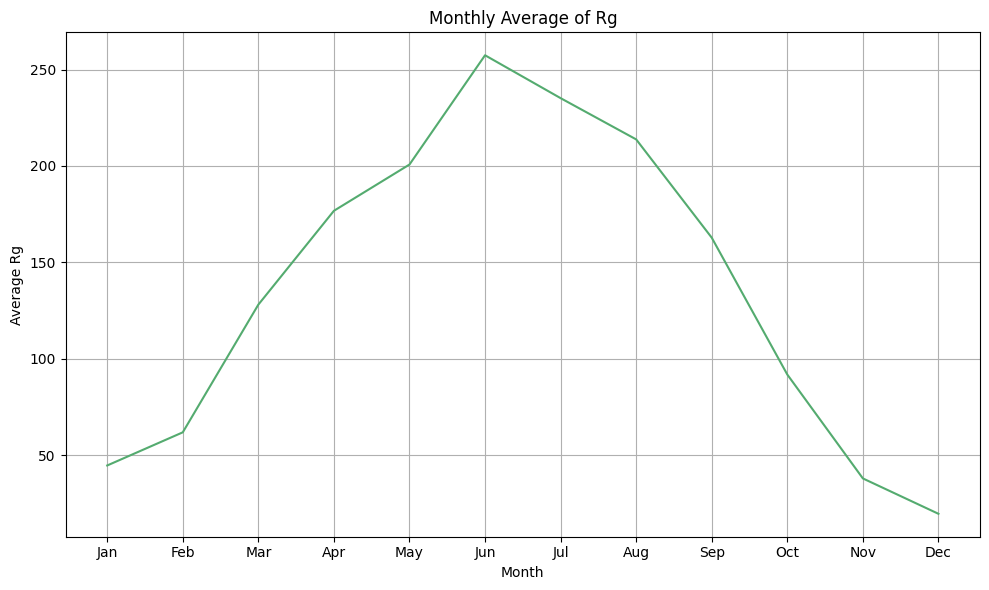

In [134]:
# Using matplotlib

plt.figure(figsize=(10, 6))
plt.plot(month_names, monthly_rg, color='#54ab6f') # bar, scatter
plt.title('Monthly Average of Rg')  # Add a title
plt.xlabel('Month')  # Add X-axis label
plt.ylabel('Average Rg')  # Add Y-axis label
plt.grid(True)  # Add gridlines (optional)
# plt.xticks(rotation=45)  # Rotate X-axis labels for better readability (optional)
plt.tight_layout()  # Adjust layout to not cut off labels
plt.show()

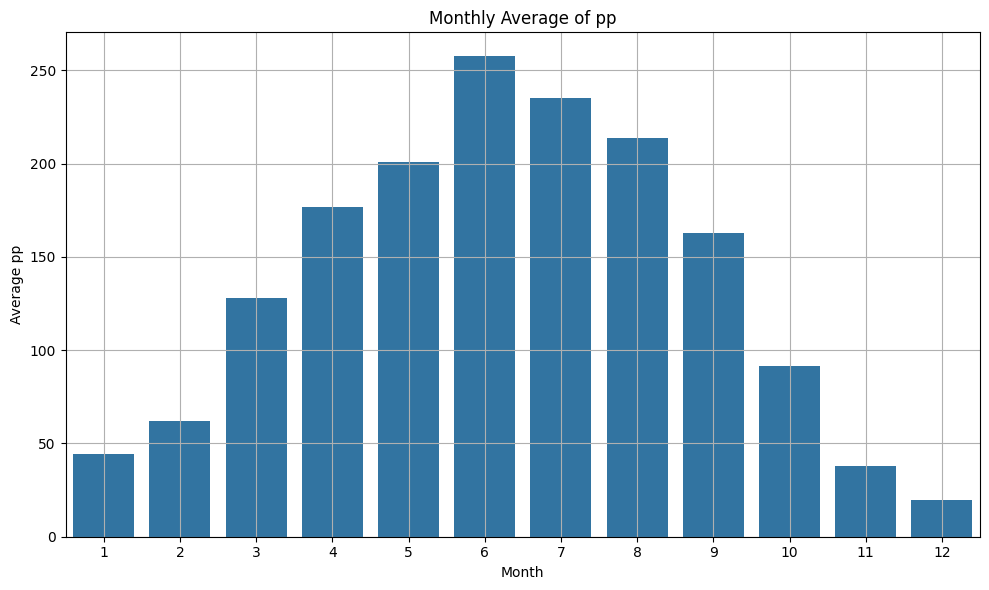

In [70]:
# Seaborn Line Plot
plt.figure(figsize=(10, 6))  # Set figure size
sns.barplot(data=monthly_rg) # you can use barplot, lineplot,
plt.title('Monthly Average of pp')  # Add a title
plt.xlabel('Month')  # Add X-axis label
plt.ylabel('Average pp')  # Add Y-axis label
# plt.xticks(rotation=45)  # Rotate X-axis labels for better readability
plt.grid(True)  # Optional: Add gridlines
plt.tight_layout()  # Adjust layout
plt.show()

In [72]:
hourlyly_rg = df.groupby(df['datetime'].dt.hour)['Rg'].mean()

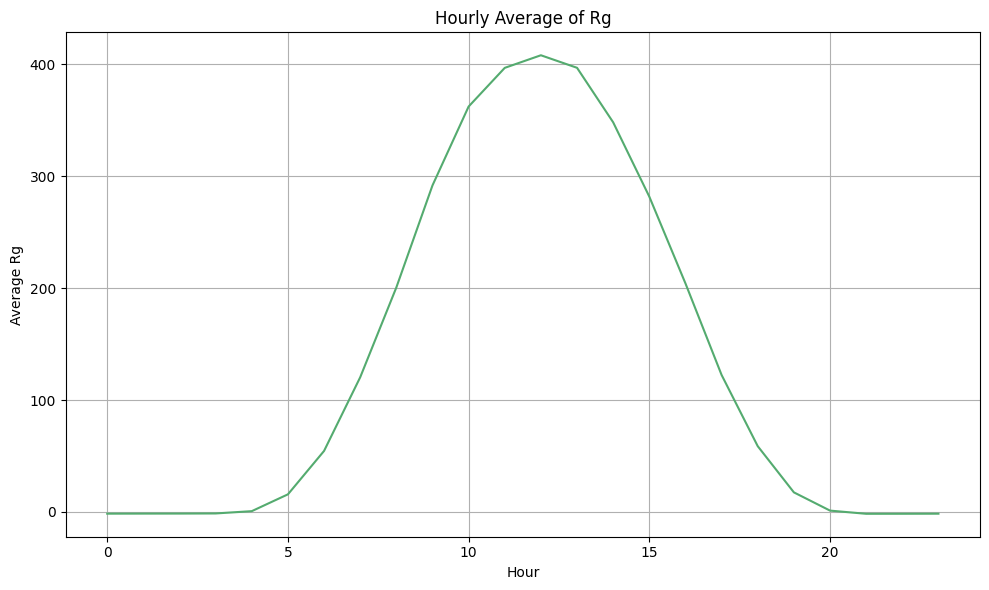

In [73]:
# Using matplotlib

plt.figure(figsize=(10, 6))
plt.plot(hourlyly_rg.index, hourlyly_rg, color='#54ab6f') # bar, scatter
plt.title('Hourly Average of Rg')  # Add a title
plt.xlabel('Hour')  # Add X-axis label
plt.ylabel('Average Rg')  # Add Y-axis label
plt.grid(True)  # Add gridlines (optional)
# plt.xticks(rotation=45)  # Rotate X-axis labels for better readability (optional)
plt.tight_layout()  # Adjust layout to not cut off labels
plt.show()

In [80]:
df['datetime'].dt.date

1        2008-09-15
2        2008-09-15
3        2008-09-15
4        2008-09-15
5        2008-09-15
            ...    
17564    2009-09-15
17565    2009-09-15
17566    2009-09-15
17567    2009-09-15
17568    2009-09-15
Name: datetime, Length: 17568, dtype: object

In [126]:
# df[(df['datetime'].dt.month == 9)][['datetime', 'Rain']].head(48)['Rain'].mean()

0.004166666666666667

In [105]:
daily_avg_participation = df.groupby(df['datetime'].dt.date)['Rain'].mean().reset_index()
daily_avg_participation['datetime'] = pd.to_datetime(daily_avg_participation['datetime'])
daily_avg_participation

,datetime,Rain
0,2008-09-15,0.004167
1,2008-09-16,0.000000
2,2008-09-17,0.000000
3,2008-09-18,0.000000
4,2008-09-19,0.000000
...,...,...
361,2009-09-11,0.000000
362,2009-09-12,0.000000
363,2009-09-13,0.000000
364,2009-09-14,0.058333


In [106]:
daily_avg_participation['datetime']

0     2008-09-15
1     2008-09-16
2     2008-09-17
3     2008-09-18
4     2008-09-19
         ...    
361   2009-09-11
362   2009-09-12
363   2009-09-13
364   2009-09-14
365   2009-09-15
Name: datetime, Length: 366, dtype: datetime64[ns]

In [130]:
monthly_avg_participation = daily_avg_participation.groupby(daily_avg_participation['datetime'].dt.month)['Rain'].sum()

In [131]:
monthly_avg_temp = df.groupby(df['datetime'].dt.month)['Ta'].mean()

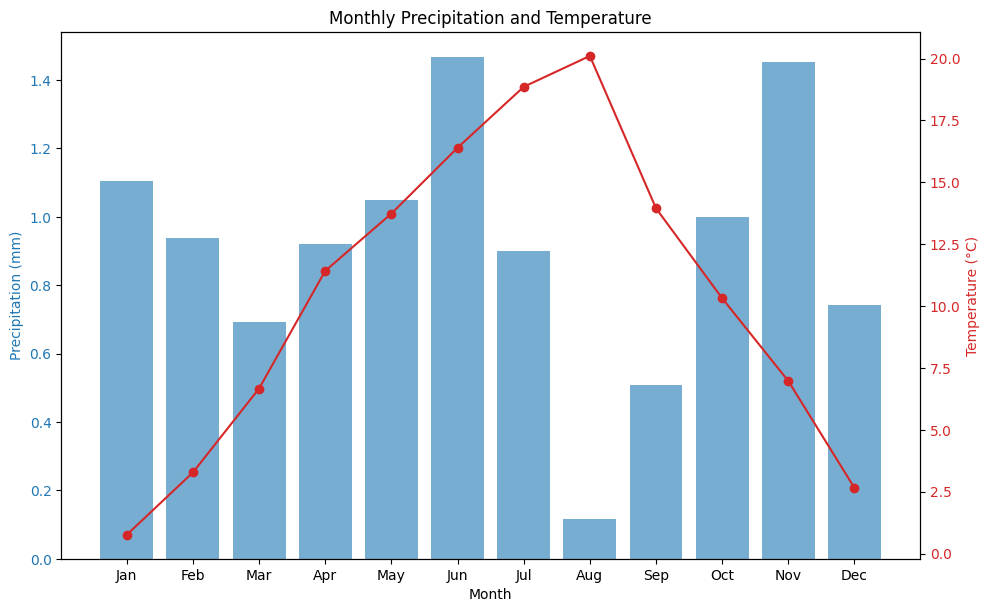

In [132]:
# Creating the figure and the first axis for the precipitation data
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar plot for monthly_rain
color = 'tab:blue'
ax1.set_xlabel('Month')
ax1.set_ylabel('Precipitation (mm)', color=color)
ax1.bar(month_names, monthly_avg_participation, color=color, alpha=0.6, label='Precipitation')
ax1.tick_params(axis='y', labelcolor=color)

# Create a twin axis for the temperature data
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Temperature (°C)', color=color)
ax2.plot(month_names, monthly_avg_temp, color=color, marker='o', linestyle='-', label='Temperature')
ax2.tick_params(axis='y', labelcolor=color)

# Title and layout
fig.tight_layout()
plt.title('Monthly Precipitation and Temperature')

# Show plot
plt.show()

In [146]:
df.groupby(df['datetime'].dt.month)['Rain']

In [135]:
monthly_rn = df.groupby(df['datetime'].dt.month)['Rn'].mean()
monthly_rg = df.groupby(df['datetime'].dt.month)['Rg'].mean()
monthly_ratm = df.groupby(df['datetime'].dt.month)['Ratm'].mean()

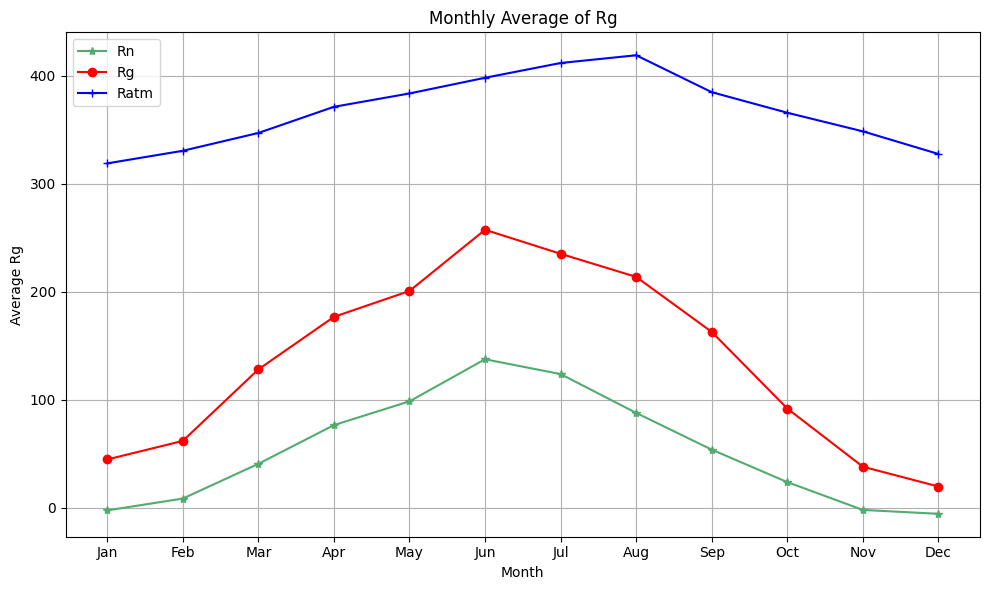

In [145]:
# Using matplotlib

plt.figure(figsize=(10, 6))
plt.plot(month_names, monthly_rn, marker='*', color='#54ab6f', label='Rn')
plt.plot(month_names, monthly_rg, marker='o', color='r', label='Rg') 
plt.plot(month_names, monthly_ratm, marker='+', color='b', label='Ratm') 
plt.title('Monthly Average of Rg')  # Add a title
plt.xlabel('Month')  # Add X-axis label
plt.ylabel('Average Rg')  # Add Y-axis label
plt.grid(True)  # Add gridlines (optional)
# plt.xticks(rotation=45)  # Rotate X-axis labels for better readability (optional)
plt.tight_layout()  # Adjust layout to not cut off labels
plt.legend(loc='upper left')  # Display the legend
plt.show()